## Introduction

In this notebook, a classification task was performed to identify whether individuals are **Extroverts** or **Introverts** based on their personality traits. The **XGBoost algorithm** was used due to its efficiency and strong performance in handling structured data. 

The dataset was prepared, key features were selected, and the model was trained and evaluated using standard metrics such as accuracy, precision, and confusion matrix.


## Load the CSV and get info on column datatypes
### Textual data is categorized as "char," while numerical values are classified as "dbl."

In [1]:
library(readr)
file_path <- "/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv"
df <- read_csv(file_path)
head(df)


Rows: 2900 Columns: 8


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Stage_fear, Drained_after_socializing, Personality
dbl (5): Time_spent_Alone, Social_event_attendance, Going_outside, Friends_c...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
4,No,4,6,No,13,5,Extrovert
9,Yes,0,0,Yes,0,3,Introvert
9,Yes,1,2,Yes,5,2,Introvert
0,No,6,7,No,14,8,Extrovert
3,No,9,4,No,8,5,Extrovert
1,No,7,5,No,6,6,Extrovert


## Summary of the dataset

In [2]:
summary(df)

 Time_spent_Alone  Stage_fear        Social_event_attendance Going_outside
 Min.   : 0.000   Length:2900        Min.   : 0.000          Min.   :0    
 1st Qu.: 2.000   Class :character   1st Qu.: 2.000          1st Qu.:1    
 Median : 4.000   Mode  :character   Median : 3.000          Median :3    
 Mean   : 4.506                      Mean   : 3.963          Mean   :3    
 3rd Qu.: 8.000                      3rd Qu.: 6.000          3rd Qu.:5    
 Max.   :11.000                      Max.   :10.000          Max.   :7    
 NA's   :63                          NA's   :62              NA's   :66   
 Drained_after_socializing Friends_circle_size Post_frequency  
 Length:2900               Min.   : 0.000      Min.   : 0.000  
 Class :character          1st Qu.: 3.000      1st Qu.: 1.000  
 Mode  :character          Median : 5.000      Median : 3.000  
                           Mean   : 6.269      Mean   : 3.565  
                           3rd Qu.:10.000      3rd Qu.: 6.000  
                

## Count missing values

In [3]:
colSums(is.na(df))

Time_spent_Alone                Stage_fear   Social_event_attendance 
                       63                        73                        62 
            Going_outside Drained_after_socializing       Friends_circle_size 
                       66                        52                        77 
           Post_frequency               Personality 
                       65                         0

## Drop rows with missing values

In [4]:
df <- na.omit(df)

In [5]:
colSums(is.na(df))

Time_spent_Alone                Stage_fear   Social_event_attendance 
                        0                         0                         0 
            Going_outside Drained_after_socializing       Friends_circle_size 
                        0                         0                         0 
           Post_frequency               Personality 
                        0                         0

In [6]:
dim(df)

[1] 2477    8

## Exploratory data analysis

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


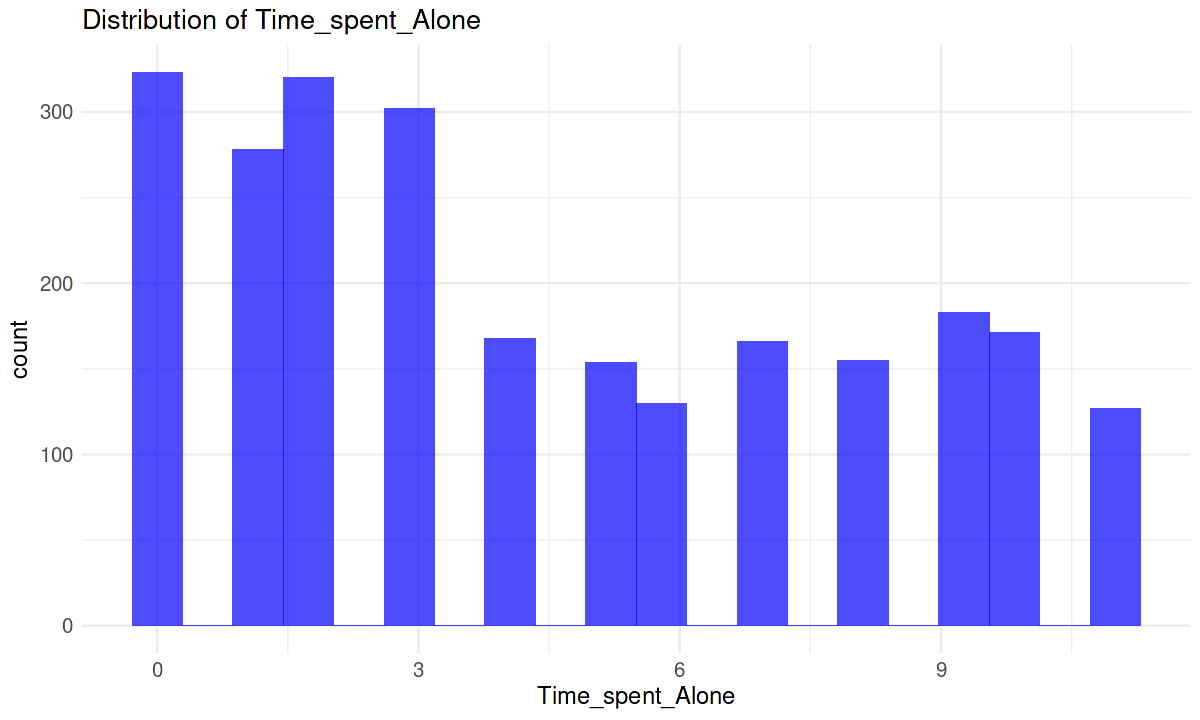

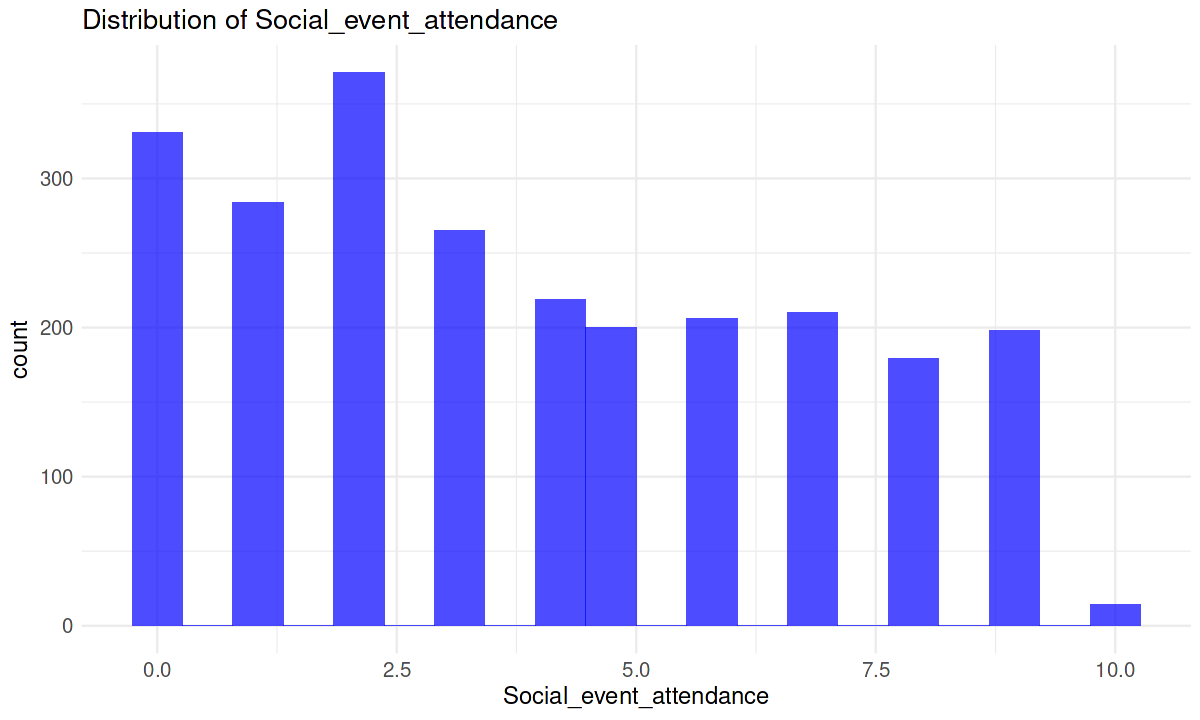

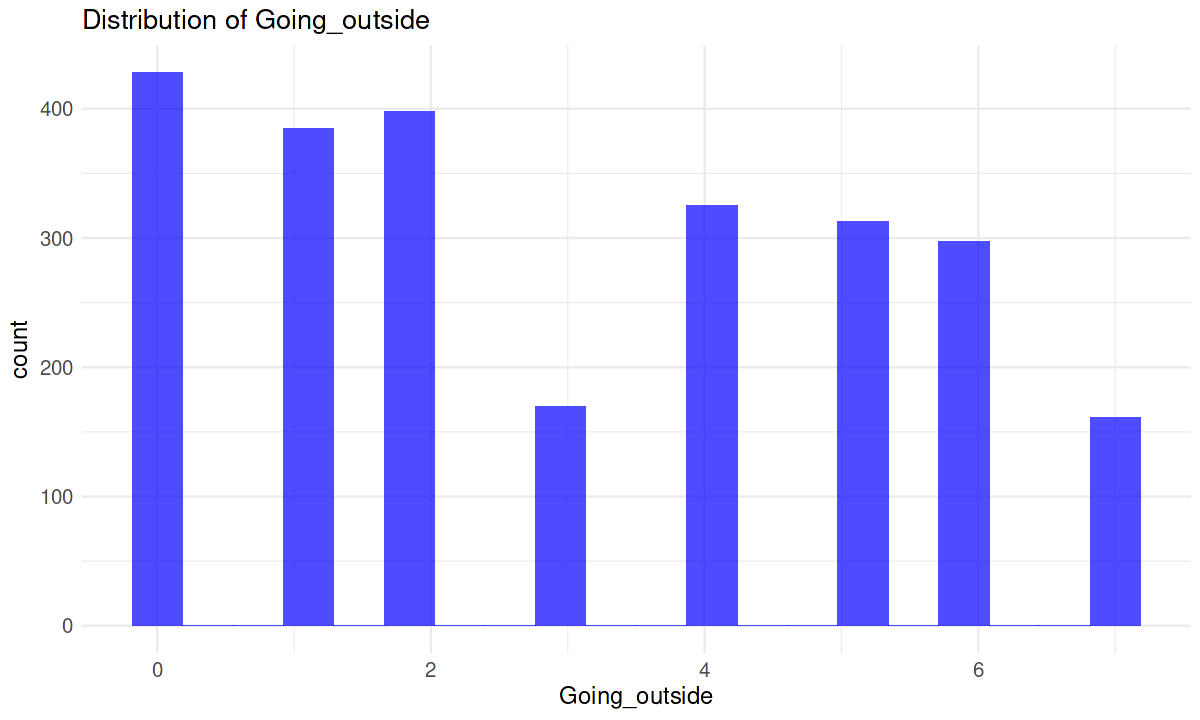

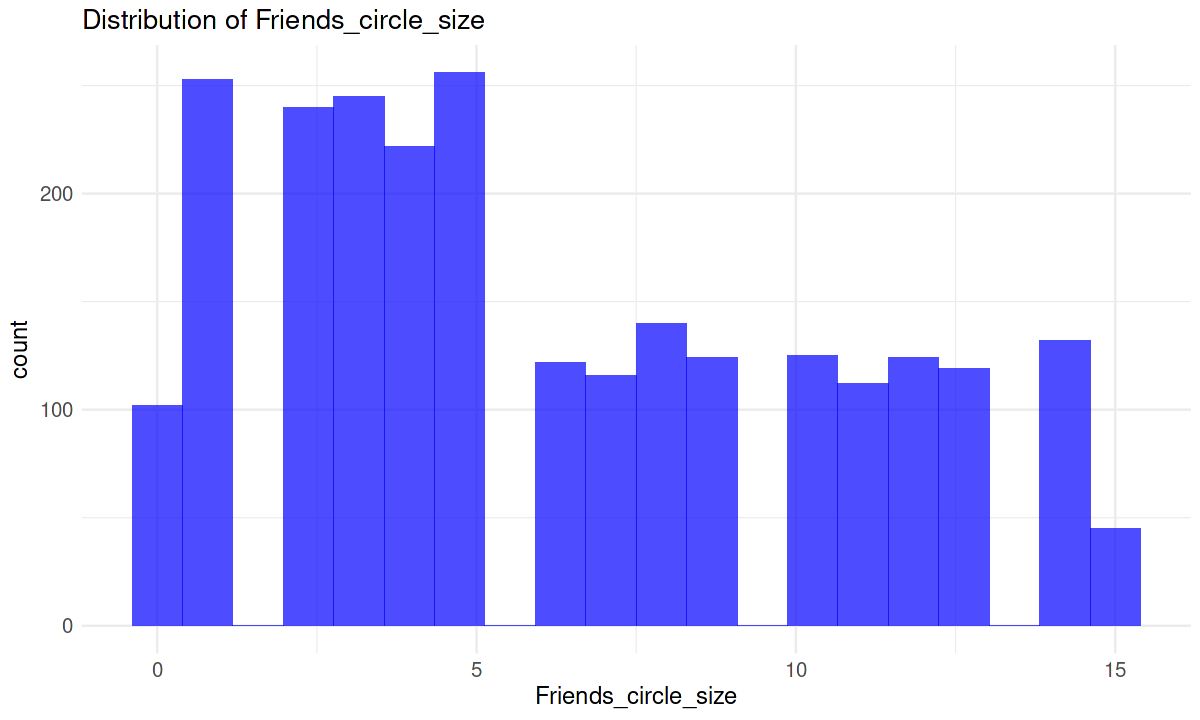

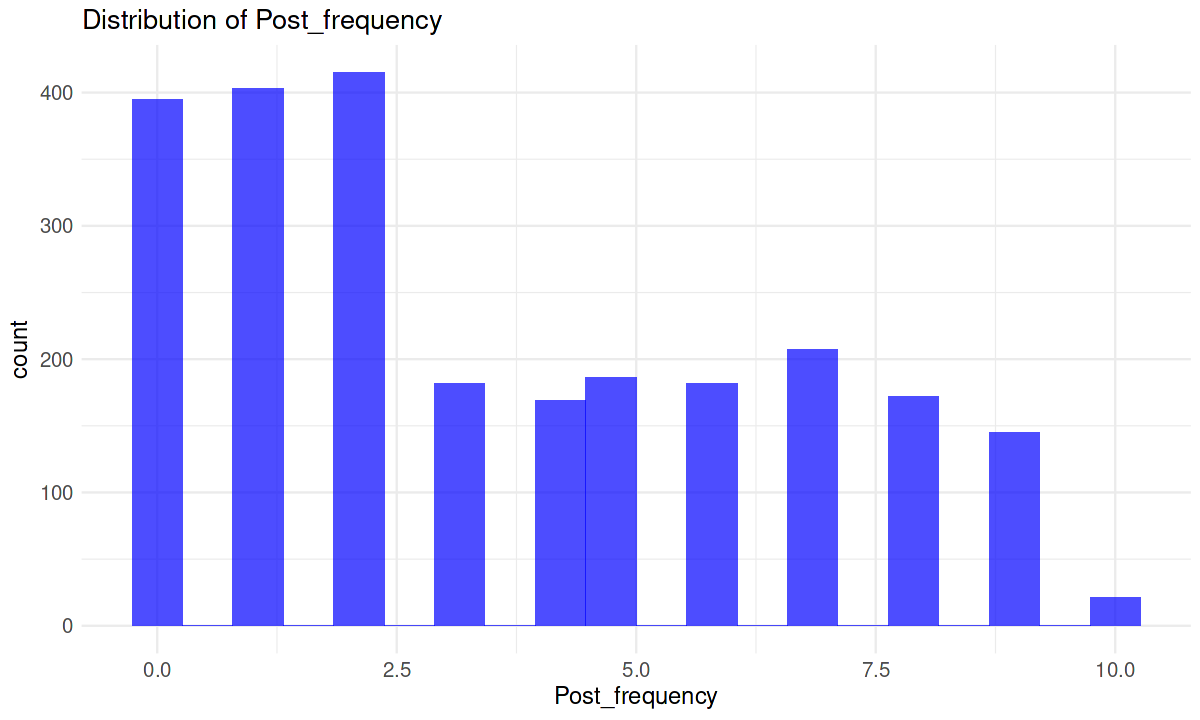

In [7]:
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 6)
numeric_cols <- c("Time_spent_Alone", "Social_event_attendance", 
                  "Going_outside", "Friends_circle_size", "Post_frequency")
for (col in numeric_cols) {
  print(
    ggplot(df, aes_string(col)) + 
    geom_histogram(bins = 20, fill = "blue", alpha = 0.7) +
    theme_minimal() +
    labs(title = paste("Distribution of", col)) +
    theme(
      plot.title = element_text(size = 16),
      axis.title = element_text(size = 14), 
      axis.text = element_text(size = 12)   
    )
  )
}


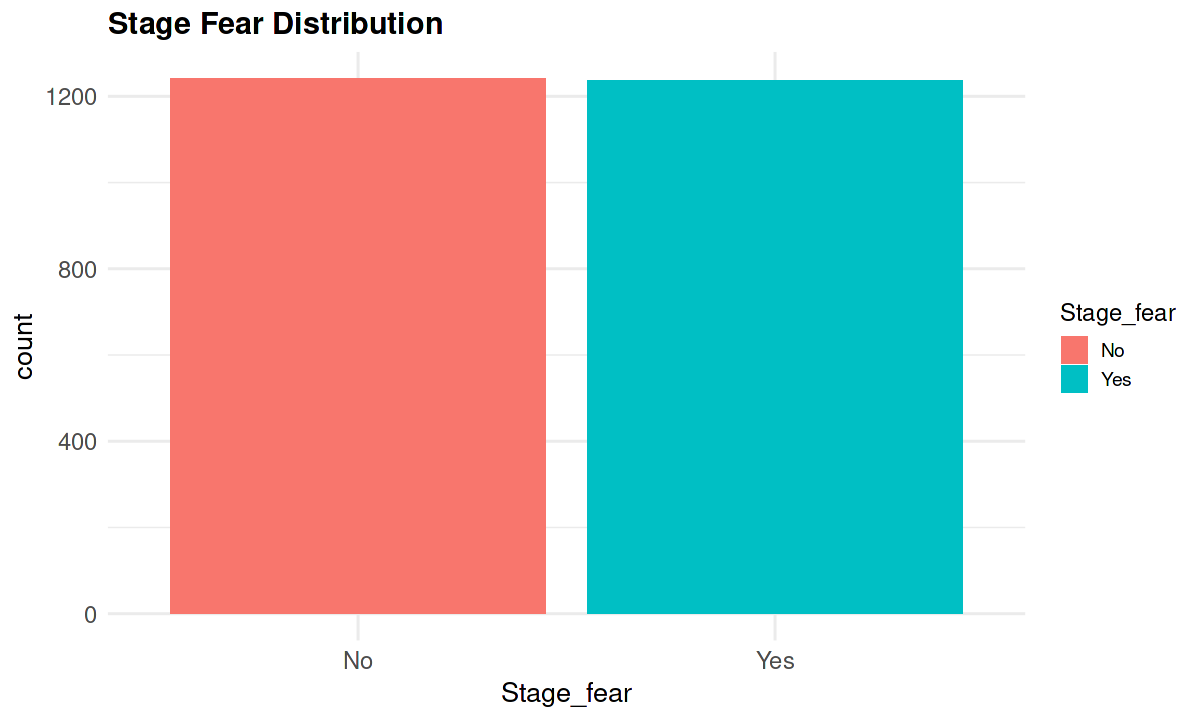

In [8]:
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(df, aes(x = Stage_fear, fill = Stage_fear)) +
  geom_bar() +
  theme_minimal() +
theme_minimal(base_size = 14) + 
  theme(plot.title = element_text(size = 18, face = "bold"), 
        axis.title.x = element_text(size = 16), 
        axis.title.y = element_text(size = 16), 
        axis.text = element_text(size = 14)) +
  labs(title = "Stage Fear Distribution")

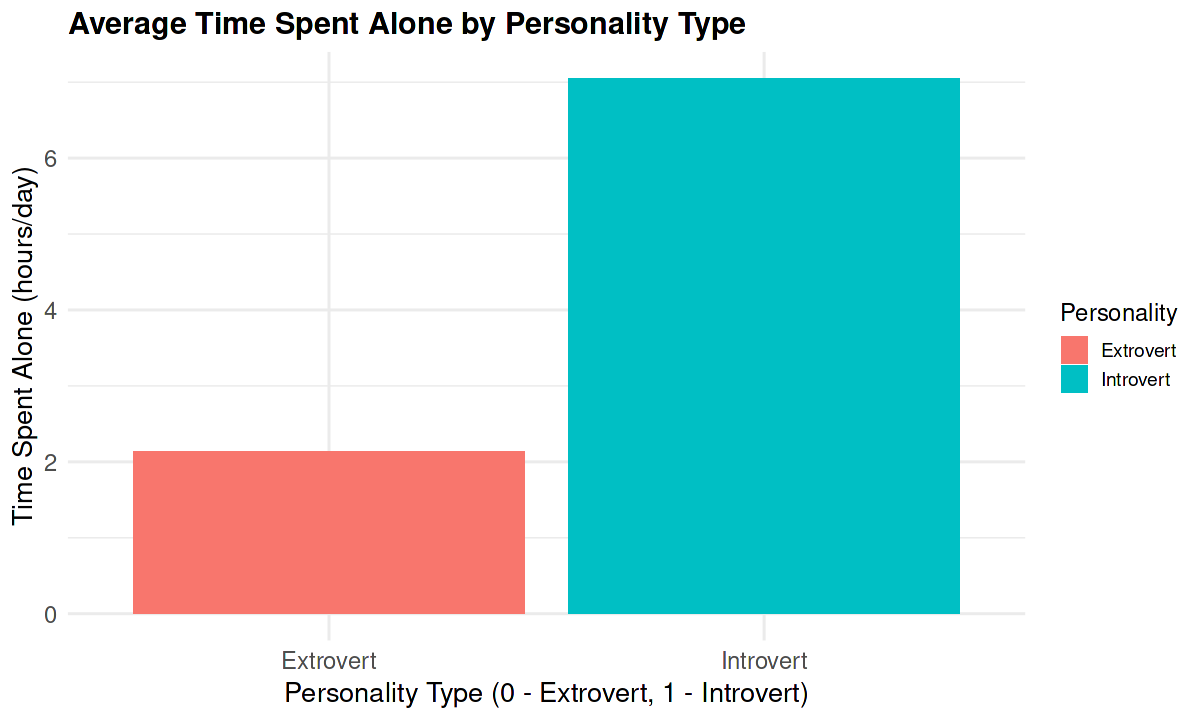

In [9]:
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(df, aes(x = Personality, y = Time_spent_Alone, fill = Personality)) +
  geom_bar(stat = "summary", fun = mean) + 
  theme_minimal(base_size = 14) + 
  theme(plot.title = element_text(size = 18, face = "bold"), 
        axis.title.x = element_text(size = 16), 
        axis.title.y = element_text(size = 16), 
        axis.text = element_text(size = 14)) +  
  labs(title = "Average Time Spent Alone by Personality Type",
       x = "Personality Type (0 - Extrovert, 1 - Introvert)",
       y = "Time Spent Alone (hours/day)")


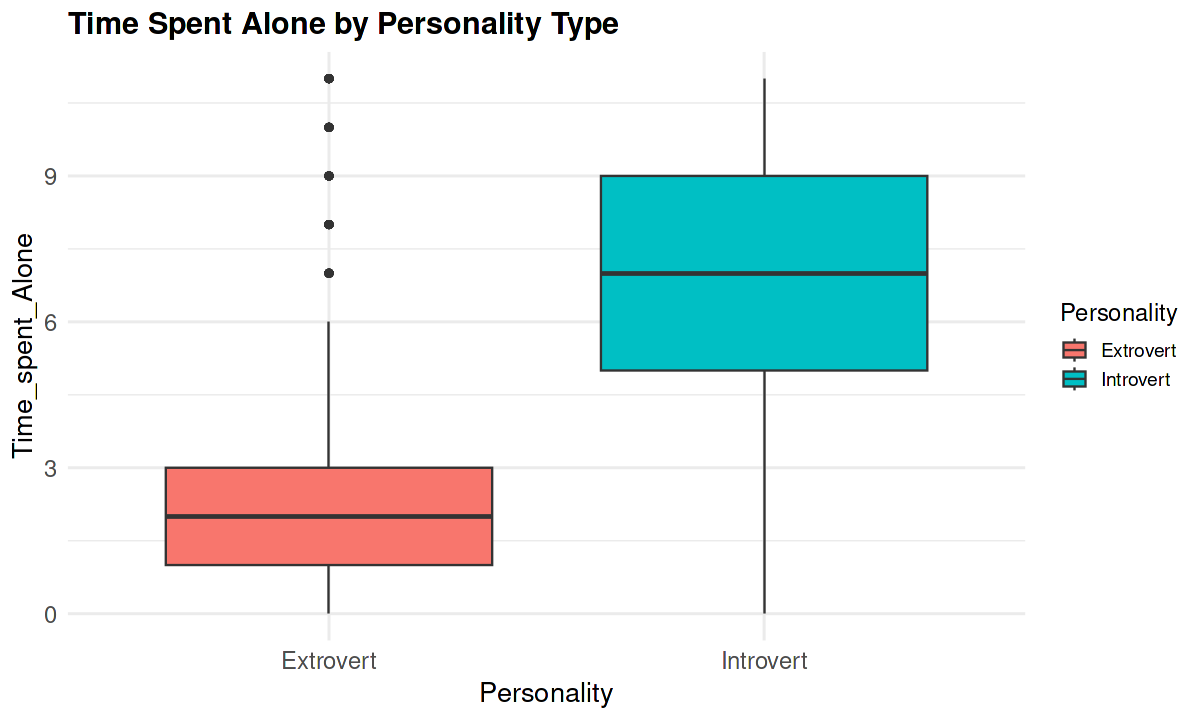

In [10]:
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(df, aes(x = Personality, y = Time_spent_Alone, fill = Personality)) +
  geom_boxplot() +
  theme_minimal() +
theme_minimal(base_size = 14) + 
  theme(plot.title = element_text(size = 18, face = "bold"), 
        axis.title.x = element_text(size = 16), 
        axis.title.y = element_text(size = 16), 
        axis.text = element_text(size = 14)) +
  labs(title = "Time Spent Alone by Personality Type")


## Correlation Analysis

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


# A tibble: 5 × 6
  term                    Time_spent_Alone Social_event_attendance Going_outside
  <chr>                              <dbl>                   <dbl>         <dbl>
1 Time_spent_Alone                  NA                      -0.734        -0.753
2 Social_event_attendance           -0.734                  NA             0.753
3 Going_outside                     -0.753                   0.753        NA    
4 Friends_circle_size               -0.718                   0.739         0.739
5 Post_frequency                    -0.734                   0.748         0.772
# ℹ 2 more variables: Friends_circle_size <dbl>, Post_frequency <dbl>


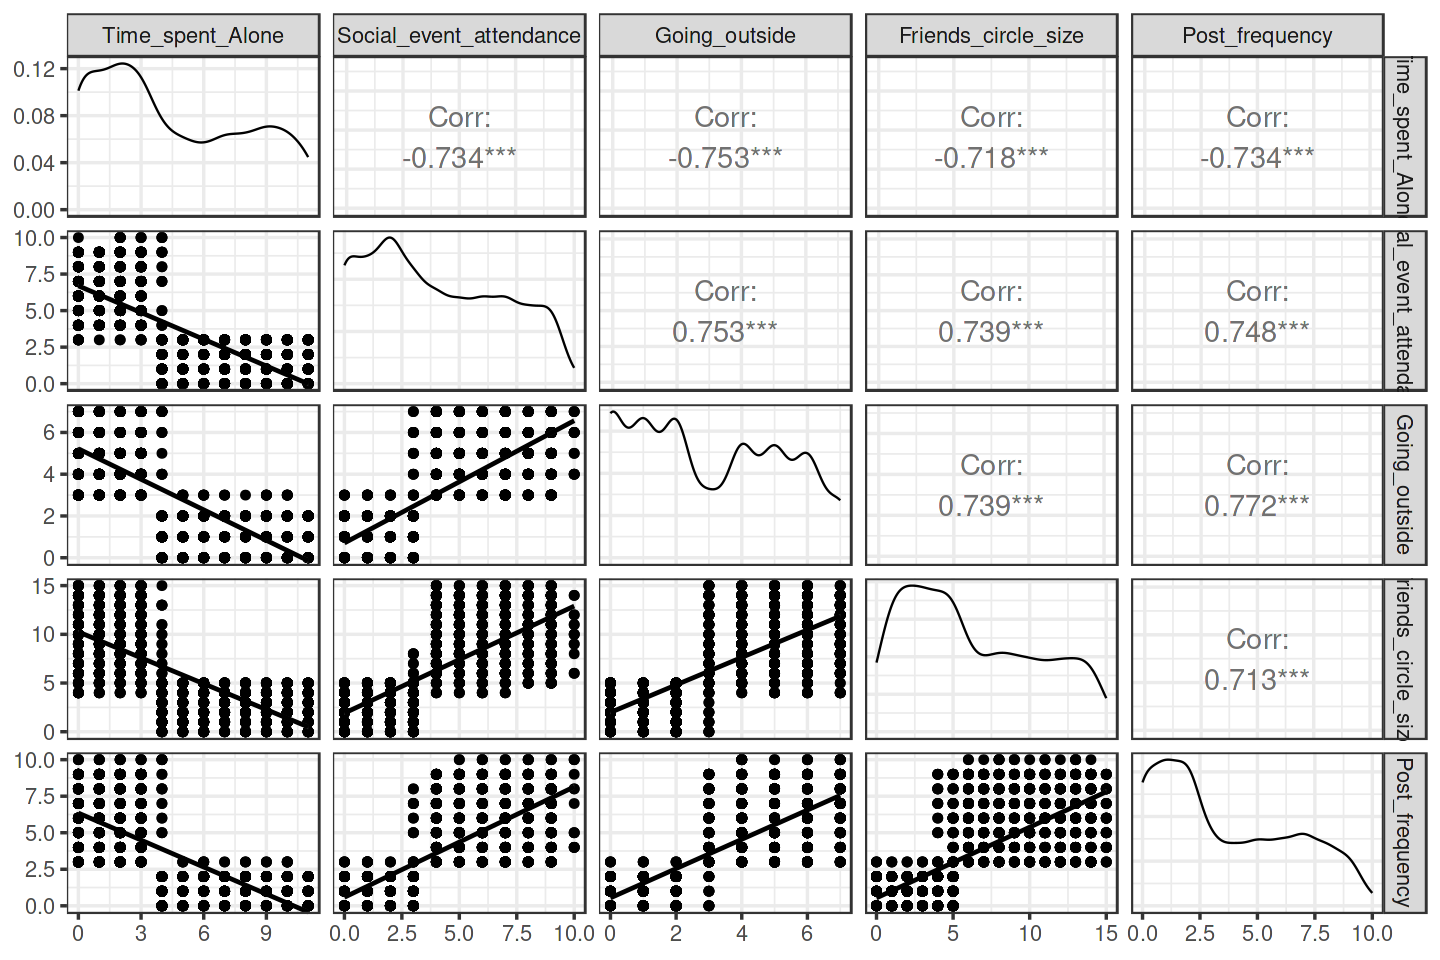

In [11]:
library(corrr)
library(GGally)
library(repr)  

options(repr.plot.width = 12, repr.plot.height = 8)

df_numeric <- df[, numeric_cols]
cor_matrix <- correlate(df_numeric)
print(cor_matrix)

ggpairs(df_numeric, 
        upper = list(continuous = wrap("cor", size = 6)), 
        lower = list(continuous = wrap("smooth", size = 2))) + 
  theme_bw(base_size = 16) 


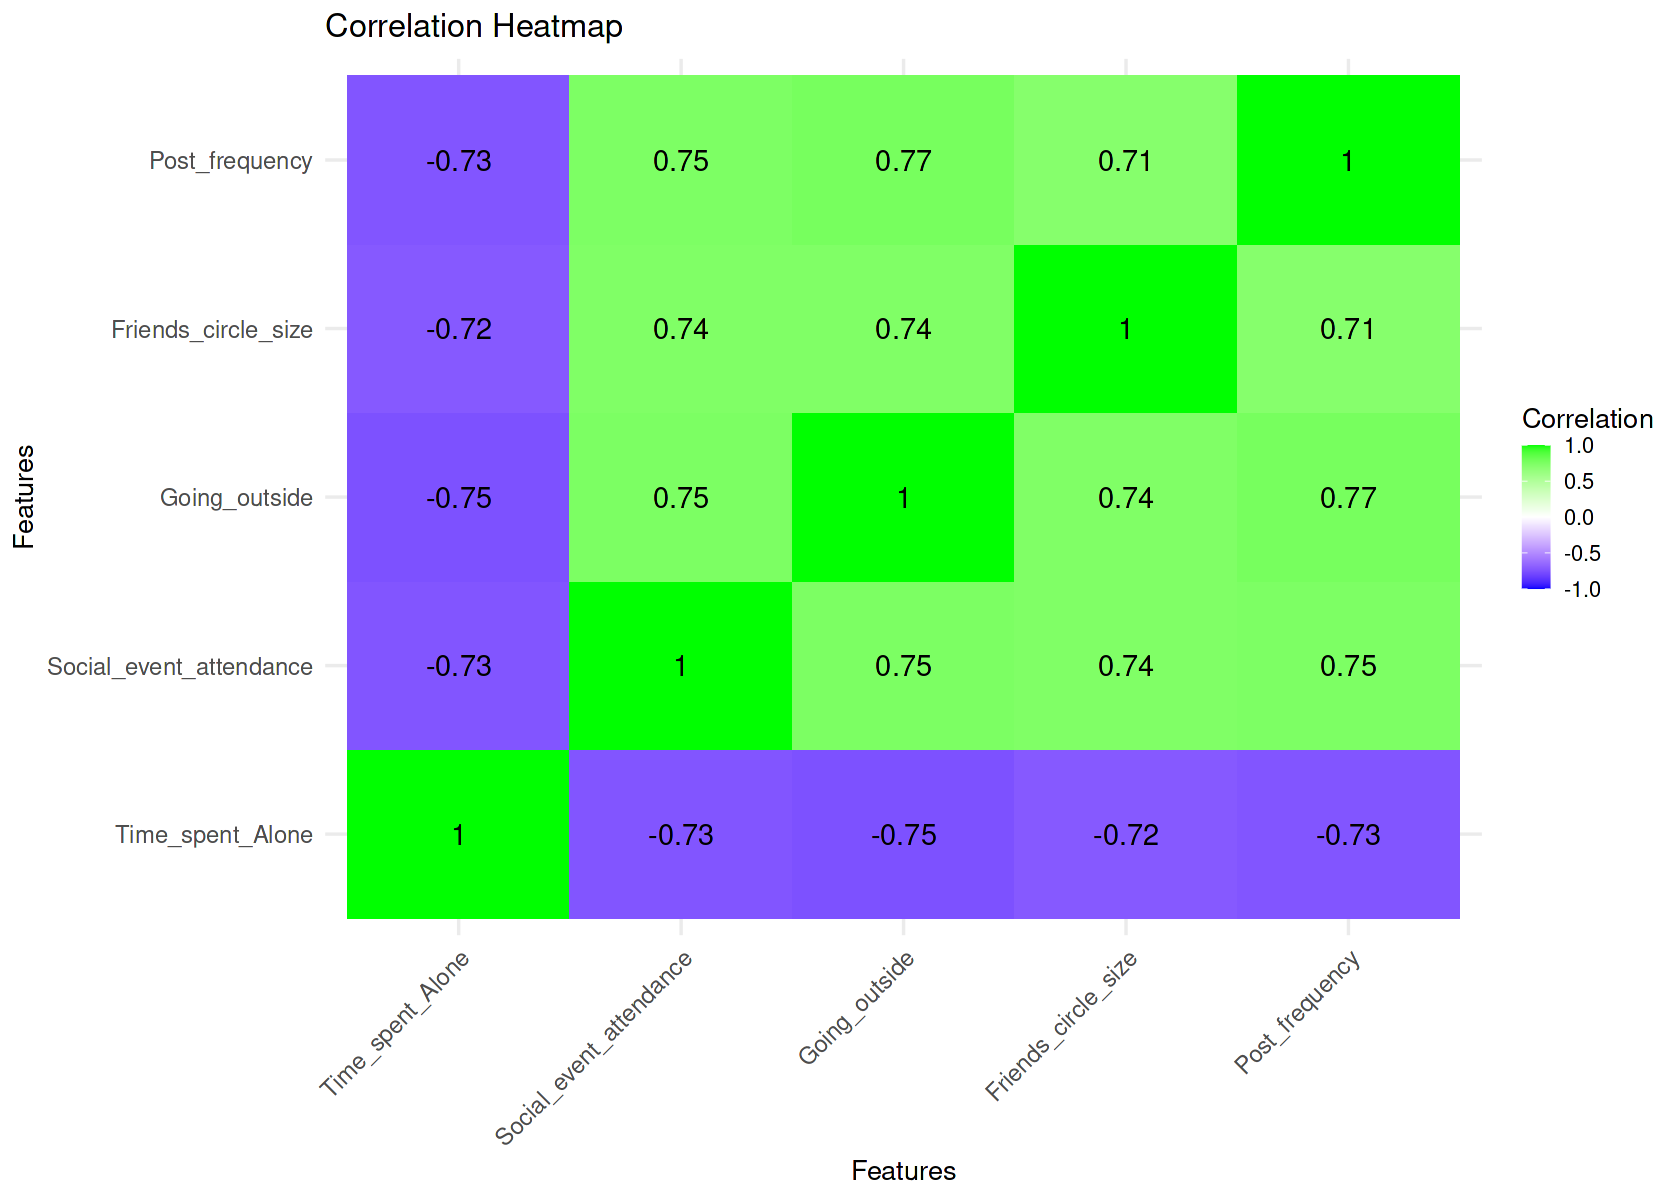

In [12]:
library(ggplot2)
library(reshape2)  
library(repr) 

options(repr.plot.width = 14, repr.plot.height = 10)

df_numeric <- df[, numeric_cols]
cor_matrix <- cor(df_numeric)

cor_melt <- melt(cor_matrix)

ggplot(cor_melt, aes(x = Var1, y = Var2, fill = value)) + 
  geom_tile() + 
  geom_text(aes(label = round(value, 2)), size = 6, color = "black") +  # Font size for text
  scale_fill_gradientn(colors = c("blue", "white","green"), limits = c(-1, 1)) +
  theme_minimal(base_size = 16) + 
  labs(title = "Correlation Heatmap",
       x = "Features",
       y = "Features",
       fill = "Correlation") +
  theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 14))


## ML Model Build with XGBoost and Get Prediction

In [13]:
library(xgboost)
library(caret)
library(dplyr)

options(warn = -1)
df$Personality <- as.factor(df$Personality)
df$Stage_fear <- as.factor(df$Stage_fear)
df$Drained_after_socializing <- as.factor(df$Drained_after_socializing)


set.seed(42)
train_idx <- createDataPartition(df$Personality, p = 0.8, list = FALSE)
train_data <- df[train_idx, ]
test_data <- df[-train_idx, ]

train_matrix <- model.matrix(Personality ~ . -1, data = train_data)
test_matrix <- model.matrix(Personality ~ . -1, data = test_data)

train_label <- as.numeric(train_data$Personality) - 1
test_label <- as.numeric(test_data$Personality) - 1

dtrain <- xgb.DMatrix(data = train_matrix, label = train_label)
dtest <- xgb.DMatrix(data = test_matrix, label = test_label)

xgb_model <- xgboost(
  data = dtrain,
  max.depth = 6,
  eta = 0.1,
  nrounds = 100,
  objective = "multi:softmax",
  num_class = length(levels(df$Personality)),
  verbose = 0
)


preds <- predict(xgb_model, dtest)


predicted_labels <- factor(preds + 1, labels = levels(df$Personality))
actual_labels <- factor(test_label + 1, labels = levels(df$Personality))

conf_matrix <- confusionMatrix(predicted_labels, actual_labels)
precision_value <- conf_matrix$byClass["Precision"]

print(conf_matrix)
print(paste("Precision:", round(precision_value, 3)))

options(warn = 0)

Loading required package: lattice




Attaching package: ‘caret’




The following object is masked from ‘package:httr’:

    progress





Attaching package: ‘dplyr’




The following object is masked from ‘package:xgboost’:

    slice




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Confusion Matrix and Statistics

           Reference
Prediction  Extrovert Introvert
  Extrovert       236        17
  Introvert        18       223
                                          
               Accuracy : 0.9291          
                 95% CI : (0.9028, 0.9502)
    No Information Rate : 0.5142          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8582          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9291          
            Specificity : 0.9292          
         Pos Pred Value : 0.9328          
         Neg Pred Value : 0.9253          
             Prevalence : 0.5142          
         Detection Rate : 0.4777          
   Detection Prevalence : 0.5121          
      Balanced Accuracy : 0.9292          
                                          
       'Positive' Class : Extrove

[1] "Precision: 0.933"


## Conclusion

In this notebook, an effective machine learning model was developed using **XGBoost** to classify individuals as **Extrovert** or **Introvert**, based on features related to personality.

---

### Key Results:

- An **accuracy** of **92.91%** was achieved.  
- A **precision score** of **93.3%** was recorded.  
- The **Kappa statistic** was found to be **0.8582**, indicating strong agreement beyond chance.  
- A **balanced accuracy** of **92.92%** was observed, reflecting consistent performance across both classes.

---

### Confusion Matrix Insights:

- Very few false predictions were made by the model, suggesting that **a high level of reliability** can be expected in practical applications.  
- Both **sensitivity** (recall for extroverts) and **specificity** (recall for introverts) were measured above **92%**, indicating that **each class was well learned and distinguished**.

---
